# Week9IndividualProject

For your Individual Project, using the same nyc-violations data, conduct an **Exploratory Data Analysis** on the dataset and produce a report in your Jupyter Notebook describing insights gleaned from the dataset. Please note that this EDA report must contain appropriate visualizations, to show trends and insights gleaned.

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the file

df = pd.read_csv('violations.csv')

# Inspect the first 5 rows of the data

df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,11/12/2020,36,4DSD,BMW,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,09/14/2020,21,TRAC,INTER,T,60790,...,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,11/25/2020,20,SUBN,NISSA,T,36030,...,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,08/20/2020,38,VAN,NaN,T,34430,...,WH,NaN,2016,NaN,0,01,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,09/09/2020,36,UT,TOYOT,V,0,...,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


In [3]:
# Find out the number of rows of the dataset

df.shape[0]

50000

In [4]:
# Check the various columns and their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Summons Number                     50000 non-null  int64  
 1   Plate ID                           50000 non-null  object 
 2   Registration State                 50000 non-null  object 
 3   Plate Type                         50000 non-null  object 
 4   Issue Date                         50000 non-null  object 
 5   Violation Code                     50000 non-null  int64  
 6   Vehicle Body Type                  49855 non-null  object 
 7   Vehicle Make                       49864 non-null  object 
 8   Issuing Agency                     50000 non-null  object 
 9   Street Code1                       50000 non-null  int64  
 10  Street Code2                       50000 non-null  int64  
 11  Street Code3                       50000 non-null  int

In [5]:
# Convert 'Issue Date' column to the right data type

df['Issue Date'] = pd.to_datetime(df['Issue Date'])

In [6]:
# Remove rows containing invalid data.
df = df[(df['Registration State'] != "99") & (df['Plate Type'] != "999")  
        & (df['Violation Code'] != 0) & (df['Vehicle Make'].notnull())
                 & (df['Violation Time'].notnull()) & (df['Vehicle Year'] != 0)]

# Get the number of rows remaining in the dataset.
print('Number of Rows: ' , df.shape[0])

Number of Rows:  39032


In [7]:
#display all columns
pd.set_option('display.max_columns', None)
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0637P,NaN,BK,NaN,NaN,WB ATLANTIC AVE @ SH,EPHERD AVE,0,1180,B,T,NaN,NaN,NaN,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0723A,NaN,BK,NaN,NaN,WB FOSTER AVE @ E 18,TH ST,0,1180,B,T,NaN,NaN,NaN,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
5,4708208868,KDW9420,NY,PAS,2020-09-21,36,4DSD,INFIN,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0655P,NaN,BK,NaN,NaN,NB KNAPP ST @ VOORHI,ES AVE,0,1180,B,T,NaN,NaN,NaN,BK,NaN,2017,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
6,8818510060,HLB4150,NY,PAS,2020-07-14,20,SUBN,HONDA,T,83630,0,0,20201120,60.0,60,60,331845,T302,M,1049A,NaN,K,I,S,Surf Ave,20ft W/of W 27th St,0,408,D,NaN,YYYYY,0800A,0600P,GY,NaN,2008,NaN,0,W,NaN,NaN,NaN,NaN
7,4702592464,HLG2917,NY,PAS,2020-08-10,36,2DSD,HONDA,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0358P,NaN,QN,NaN,NaN,EB ROCKAWAY BLVD @ 1,00TH ST,0,1180,B,T,NaN,NaN,NaN,BK,NaN,2016,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,8679445125,JBB9580,NY,PAS,2020-09-16,31,SUBN,AUDI,T,26790,21690,13810,20220729,5.0,5,5,357086,T105,H,0115P,NaN,NY,O,173,Mott St,NaN,0,408,K2,NaN,YYYYYY,0700A,0600P,BK,NaN,2011,NaN,0,087,NaN,NaN,NaN,NaN
49994,8875951779,JLJ4585,NY,PAS,2020-11-17,21,4DSD,MITSU,T,57090,40404,40404,20210816,101.0,101,101,350438,T402,N,0936A,NaN,Q,F,234,New Haven Ave,NaN,0,408,d1,NaN,Y,0830A,1000A,BLACK,NaN,2017,NaN,0,W,21-No Parking (street clean),NaN,NaN,NaN
49995,4014245755,JPN4910,NY,PAS,2020-06-25,5,PICK,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0342P,NaN,MN,NaN,NaN,EB E 125TH ST @ 2ND,AVE,0,1111,C,T,NaN,NaN,NaN,RD,NaN,2019,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
49997,8849769581,HES6895,NY,PAS,2020-11-03,46,SUBN,CADIL,T,27120,59520,49120,20220413,48.0,48,48,367900,T801,B,0933P,NaN,BX,F,797,E 182nd St,NaN,0,408,E2,NaN,YYYYYYY,NaN,NaN,RD,NaN,2005,NaN,0,K,NaN,NaN,NaN,NaN


In [8]:
#check number of null values per each column
df.isnull().sum()

Summons Number                           0
Plate ID                                 0
Registration State                       0
Plate Type                               0
Issue Date                               0
Violation Code                           0
Vehicle Body Type                       74
Vehicle Make                             0
Issuing Agency                           0
Street Code1                             0
Street Code2                             0
Street Code3                             0
Vehicle Expiration Date                  0
Violation Location                   17771
Violation Precinct                       0
Issuer Precinct                          0
Issuer Code                              0
Issuer Command                       17753
Issuer Squad                         17753
Violation Time                           0
Time First Observed                  37602
Violation County                        51
Violation In Front Of Or Opposite    17862
House Numbe

In [9]:
#replace null values with mode in columns that have less missing values
df['Vehicle Body Type'].fillna(df['Vehicle Body Type'].mode()[0], inplace=True)
df['Violation County'].fillna(df['Violation County'].mode()[0], inplace=True)
df['Street Name'].fillna(df['Street Name'].mode()[0], inplace=True)
df['Vehicle Color'].fillna(df['Vehicle Color'].mode()[0], inplace=True)

In [11]:
#drop columns whose number of missing values exceed 2000
for col in df.columns:
    if df[col].isnull().sum() >2000:
        df.drop(col, axis=1, inplace=True)

In [12]:
#check if the columns in the above cell were dropped
len(df.columns)

25

In [13]:
#drop all NaN values in the data set
df = df.dropna()

In [14]:
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Issuer Code,Violation Time,Violation County,Street Name,Date First Observed,Law Section,Sub Division,Vehicle Color,Vehicle Year,Feet From Curb
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,0,0,0,0,0,0,0637P,BK,WB ATLANTIC AVE @ SH,0,1180,B,GY,2007,0
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,0,0,0,0,0,0,0723A,BK,WB FOSTER AVE @ E 18,0,1180,B,GY,2002,0
5,4708208868,KDW9420,NY,PAS,2020-09-21,36,4DSD,INFIN,V,0,0,0,0,0,0,0,0655P,BK,NB KNAPP ST @ VOORHI,0,1180,B,BK,2017,0
6,8818510060,HLB4150,NY,PAS,2020-07-14,20,SUBN,HONDA,T,83630,0,0,20201120,60,60,331845,1049A,K,Surf Ave,0,408,D,GY,2008,0
7,4702592464,HLG2917,NY,PAS,2020-08-10,36,2DSD,HONDA,V,0,0,0,0,0,0,0,0358P,QN,EB ROCKAWAY BLVD @ 1,0,1180,B,BK,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,8679445125,JBB9580,NY,PAS,2020-09-16,31,SUBN,AUDI,T,26790,21690,13810,20220729,5,5,357086,0115P,NY,Mott St,0,408,K2,BK,2011,0
49994,8875951779,JLJ4585,NY,PAS,2020-11-17,21,4DSD,MITSU,T,57090,40404,40404,20210816,101,101,350438,0936A,Q,New Haven Ave,0,408,d1,BLACK,2017,0
49995,4014245755,JPN4910,NY,PAS,2020-06-25,5,PICK,FORD,V,0,0,0,0,0,0,0,0342P,MN,EB E 125TH ST @ 2ND,0,1111,C,RD,2019,0
49997,8849769581,HES6895,NY,PAS,2020-11-03,46,SUBN,CADIL,T,27120,59520,49120,20220413,48,48,367900,0933P,BX,E 182nd St,0,408,E2,RD,2005,0


In [15]:
#drop rows with vehicle year that are greater than 2022 since they are not updated
for index, col in df.iterrows():
    if df.loc[index, 'Vehicle Year'] > 2022:
        df.drop(index, axis=0, inplace=True)

In [16]:
#select Number of Summons per Registration State
summons_per_state = df.groupby(['Registration State'])['Summons Number'].count()
summons_per_state


Registration State
AL       14
AR        2
AZ       42
CA       30
CO        8
CT      230
DC        5
DE       27
FL      408
GA       94
IA        3
ID        1
IL       44
IN        3
KS        1
KY       10
LA        4
MA       91
MD       94
ME       11
MI       27
MN       16
MO        8
MS        3
MT        3
NC      114
NE        1
NH        9
NJ     1397
NM        1
NV        4
NY    35377
OH       53
OR        4
PA      538
RI       20
SC       43
SD        5
TN       31
TX       77
VA      140
VT       12
WA       12
WI        5
WV        4
Name: Summons Number, dtype: int64

Text(0, 0.5, 'Counts of Summons')

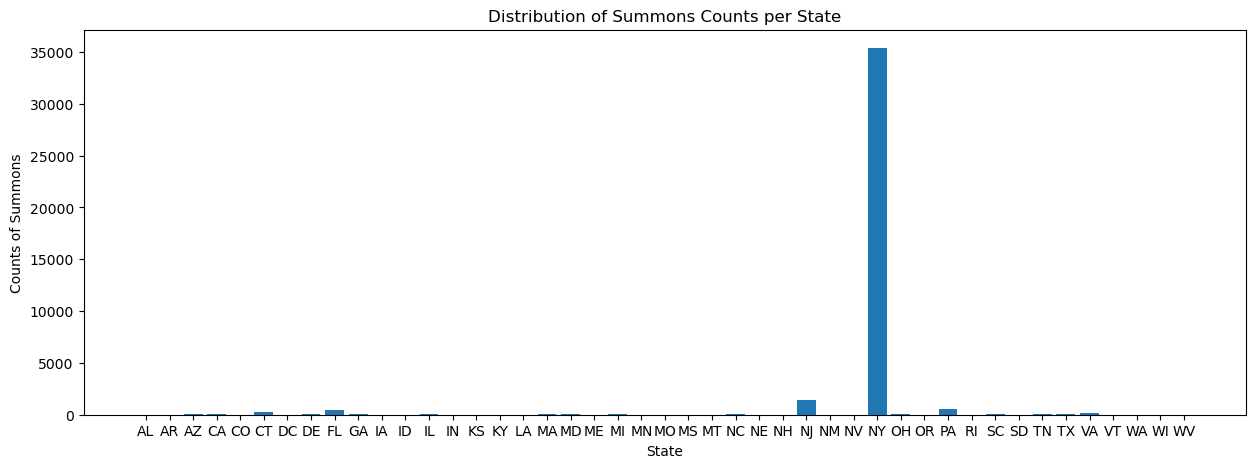

In [17]:
#plot number summons per state 
plt.figure(figsize=(15, 5))
plt.bar(summons_per_state.index, summons_per_state.values );
plt.title('Distribution of Summons Counts per State')
plt.xlabel('State')
plt.ylabel('Counts of Summons')


Text(0, 0.5, 'Counts of Summons')

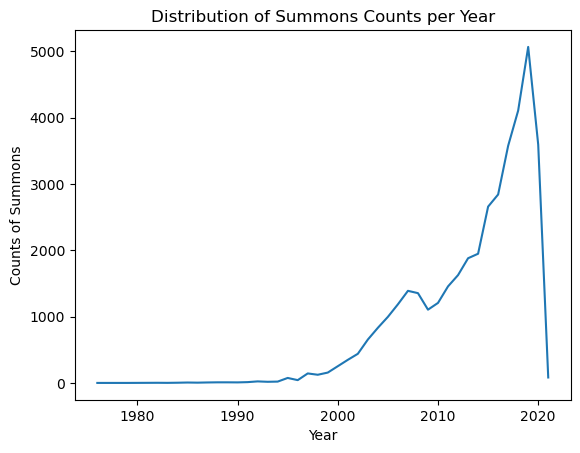

In [18]:
#plot number summons per vehicle year
summons_per_year = df.groupby(['Vehicle Year'])['Summons Number'].count()
plt.plot(summons_per_year);
plt.title('Distribution of Summons Counts per Year')
plt.xlabel('Year')
plt.ylabel('Counts of Summons')

Text(0, 0.5, 'Number Summons')

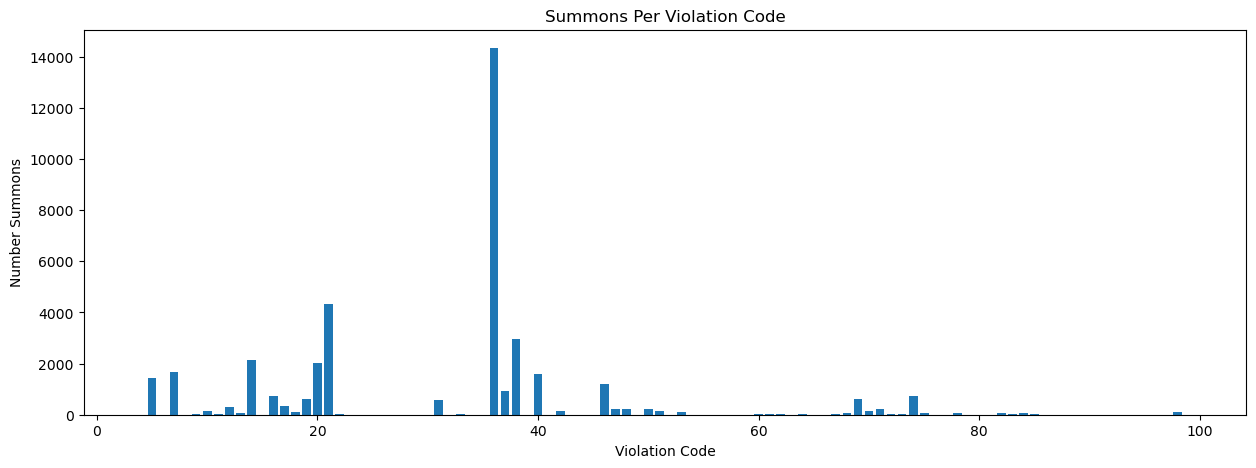

In [32]:
#plot summons per violation code
plt.figure(figsize=(15, 5))
summons_per_violation_code = df.groupby(['Violation Code'])['Summons Number'].count()
plt.bar(summons_per_violation_code.index,summons_per_violation_code.values);
plt.title('Summons Per Violation Code')
plt.xlabel('Violation Code')
plt.ylabel('Number Summons')


Text(0, 0.5, 'Number of Summons')

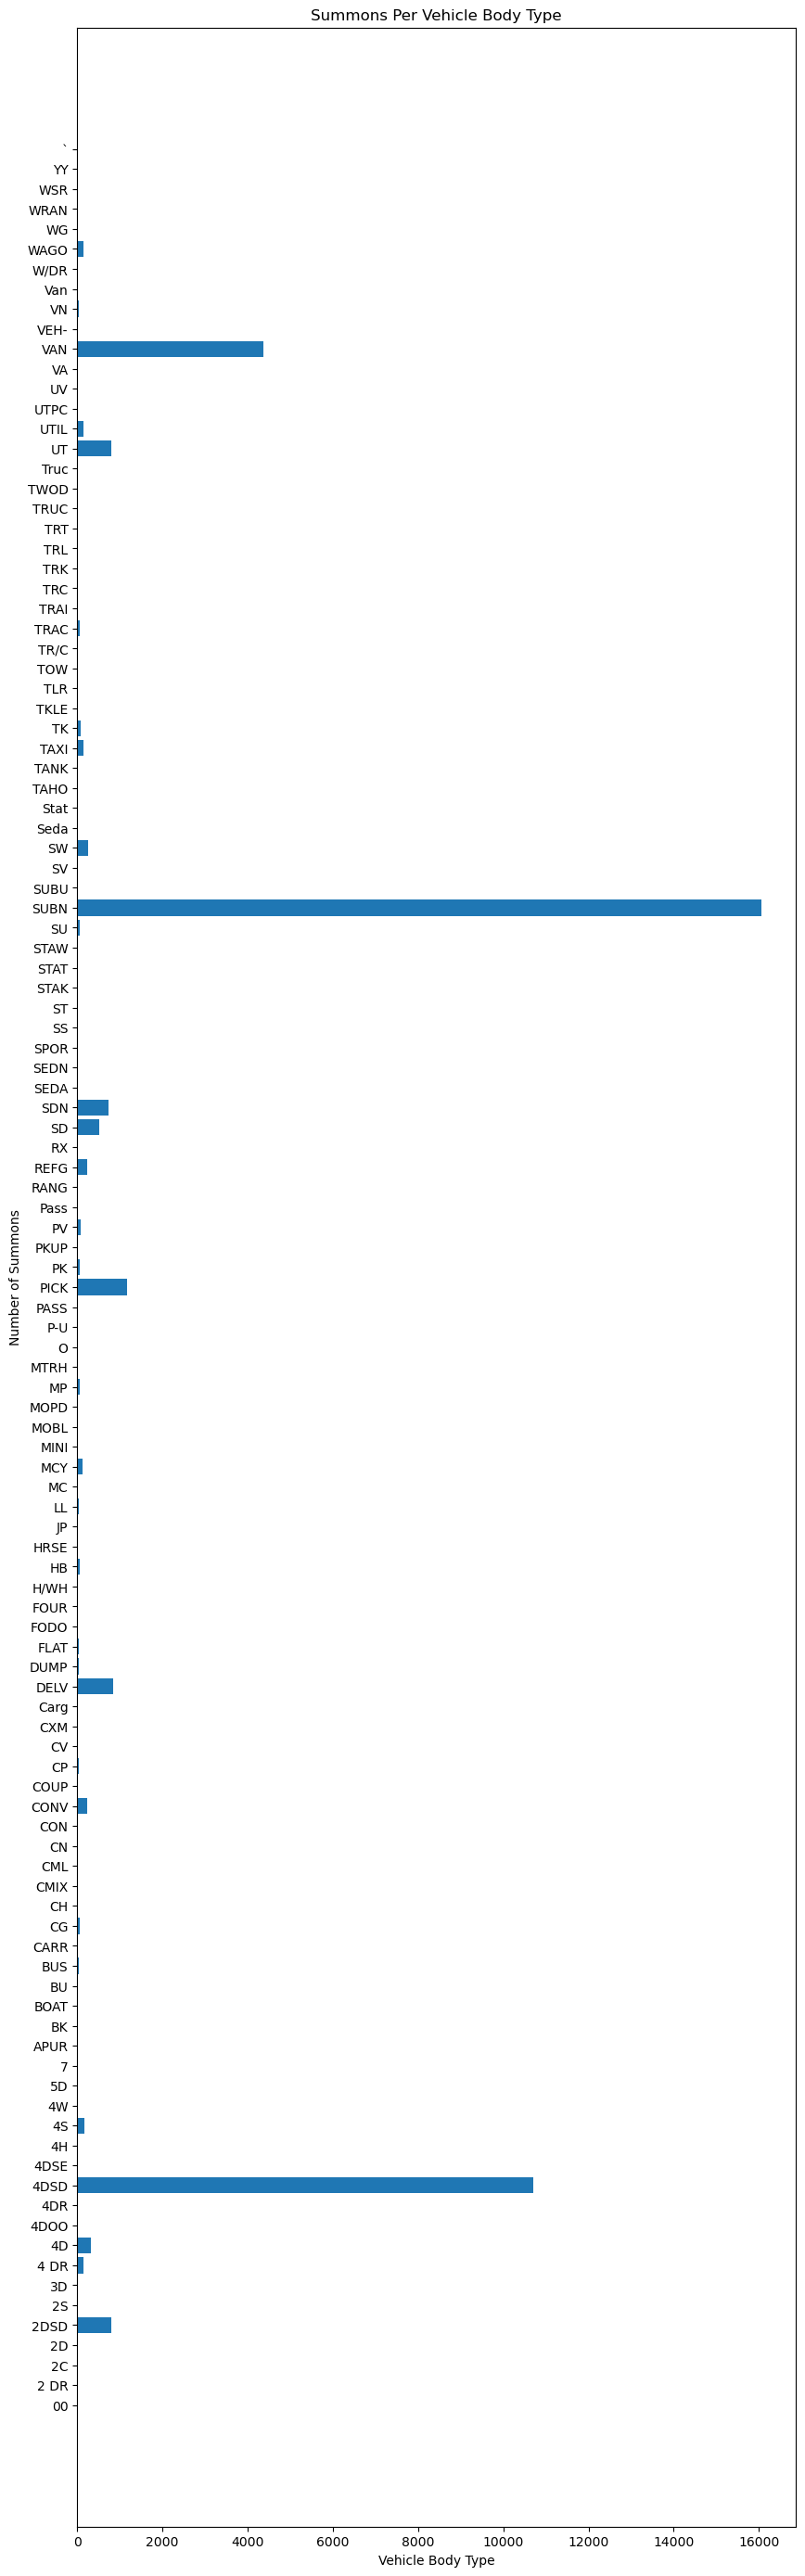

In [46]:
#plot summons per vehicle body type
plt.figure(figsize=(10, 35))
summons_per_vehicle_body_type = df.groupby(['Vehicle Body Type'])['Summons Number'].count()
plt.barh(summons_per_vehicle_body_type.index,summons_per_vehicle_body_type.values);
plt.title('Summons Per Vehicle Body Type')
plt.xlabel('Vehicle Body Type')
plt.ylabel('Number of Summons')